Below the code to simulate the evolution in time of the Kuramoto-Sivashinky equation

Kuramoto-Sivashinsky equation
$u_t = -uu_x-u_{xx}-u_{xxxx}$




In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
N=1024
# Initial condition
x = 32*np.pi*np.transpose(np.arange(1, N+1))/N
# u is the initial condition -- modify u if you want to change initial conditions
u = np.cos(x/16)*(1+np.sin(x/16))
v = np.fft.fft(u)

In [3]:
# Numerical grid
h = 0.025
k = np.transpose(np.conj(np.concatenate((np.arange(0, N/2), np.array([0]), np.arange(-N/2+1, 0))))) / 16
L = np.power(k,2) - np.power(k,4)
E = np.exp(h*L)
E2 = np.exp(h*L/2)
M= 16
r = np.exp(1j*np.pi*(np.arange(1, M+1)-0.5) / M)
LR = h*np.transpose(np.repeat([L], M, axis=0)) + np.repeat([r], N, axis=0)
Q= h*np.real(np.mean((np.exp(LR/2)-1)/LR, axis=1))
f1 = h*np.real(np.mean((-4-LR+np.exp(LR)*(4-3*LR+LR**2))/LR**3, axis=1))
f2 = h*np.real(np.mean((2+LR+np.exp(LR)*(-2+LR))/LR**3, axis=1))
f3 = h*np.real(np.mean((-4-3*LR-LR**2+np.exp(LR)*(4-LR))/LR**3, axis=1))

In [4]:
# Initialization of the time stepping loop
uu=np.array([u])
tt=0
tmax = 100
nmax = round(tmax/h)
nplot = int((tmax/250)/h)
g = -0.5*k

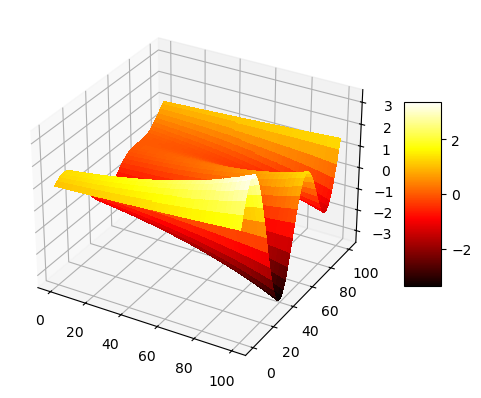

In [5]:
#Loop for the evolution in time
for n in range(1,nmax+1):
  t = n*h
  Nv = g*np.fft.fft(np.real(np.power(np.fft.ifft(v),2)))
  a = E2*v+Q*Nv
  Na = g*np.fft.fft(np.real(np.power(np.fft.ifft(a),2)))
  b = E2*v +Q*Na
  Nb = g*np.fft.fft(np.real(np.power(np.fft.ifft(b),2)))
  c = E2*a+Q*(2*Nb-Nv)
  Nc = g*np.fft.fft(np.real(np.power(np.fft.ifft(c),2)))
  v = E*v + Nv*f1+2*(Na+Nb)*f2+Nc*f3
  if n%nplot == 0:
        u = np.real(np.fft.ifft(v))
        uu = np.append(uu, np.array([u]), axis=0)
        tt = np.hstack((tt, t))

# plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
tt, x = np.meshgrid(tt, x)
surf = ax.plot_surface(tt, x, uu.transpose(), cmap=cm.hot, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
plt.savefig('ks_solution.png')